In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

#pip install opencv-python
import cv2

import random
import collections
import pickle


In [10]:
PATH = r"C:\Users\JCK\Documents\northwestern\DS 422\99\catsndogs"
# /Users/jck/Documents/MSDS 422/Unit 99/TensorFlow - CNN/Data/cat-and-dog/training_set/training_set
# /Users/jck/Documents/MSDS 422/Unit 99/TensorFlow - CNN/Data/cat-and-dog/test_set/test_set
TRAIN_PATH = PATH + r"\training_set\training_set"
TEST_PATH = PATH + r"\test_set\test_set"

CATEGORIES = ["cats","dogs"]


In [11]:

def getImages( WHERE, IMG_SIZE ) :
    imgList = []
    for category in CATEGORIES :
        target_num = CATEGORIES.index( category )
        path = os.path.join( WHERE, category )
        print( "path=", path)
        for img in os.listdir( path ) :
            try:
                filename = os.path.join( path, img )
                img_array = cv2.imread( filename, cv2.IMREAD_GRAYSCALE )
                print( "BEFORE .... ", img_array.shape )
                new_array = cv2.resize( img_array, (IMG_SIZE, IMG_SIZE) )
                print( "AFTER .... ", new_array.shape )
                imgList.append( [new_array, target_num])
            except Exception as e:
                pass
    return imgList
    


In [12]:
# SET THIS TO WHATEVER SIZE YOU THINK IS BEST ....
IMG_SIZE = 300

#trainData = getImages( TRAIN_PATH, IMG_SIZE  )
#testData = getImages( TEST_PATH, IMG_SIZE  )

totalData = getImages( TRAIN_PATH, IMG_SIZE  ) + getImages( TEST_PATH, IMG_SIZE  )

path= C:\Users\JCK\Documents\northwestern\DS 422\99\catsndogs\training_set\training_set\cats
BEFORE ....  (280, 300)
AFTER ....  (300, 300)
BEFORE ....  (499, 489)
AFTER ....  (300, 300)
BEFORE ....  (499, 403)
AFTER ....  (300, 300)
BEFORE ....  (149, 150)
AFTER ....  (300, 300)
BEFORE ....  (499, 336)
AFTER ....  (300, 300)
BEFORE ....  (407, 379)
AFTER ....  (300, 300)
BEFORE ....  (269, 259)
AFTER ....  (300, 300)
BEFORE ....  (375, 499)
AFTER ....  (300, 300)
BEFORE ....  (333, 500)
AFTER ....  (300, 300)
BEFORE ....  (375, 499)
AFTER ....  (300, 300)
BEFORE ....  (374, 500)
AFTER ....  (300, 300)
BEFORE ....  (368, 328)
AFTER ....  (300, 300)
BEFORE ....  (400, 353)
AFTER ....  (300, 300)
BEFORE ....  (200, 296)
AFTER ....  (300, 300)
BEFORE ....  (374, 500)
AFTER ....  (300, 300)
BEFORE ....  (273, 500)
AFTER ....  (300, 300)
BEFORE ....  (374, 500)
AFTER ....  (300, 300)
BEFORE ....  (480, 500)
AFTER ....  (300, 300)
BEFORE ....  (335, 344)
AFTER ....  (300, 300)
BEFORE ....  (

Total Images 10028
Category cats = 5011
Category dogs = 5017


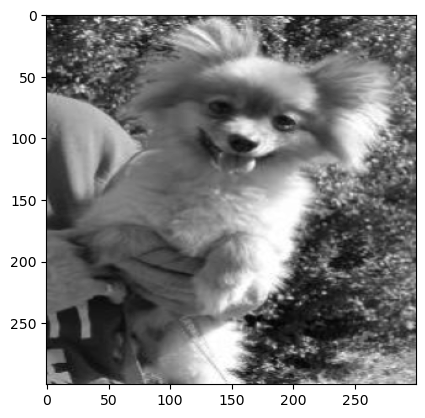

This is a dogs


In [13]:
who = 0

print( "Total Images",len( totalData ))
countList = [i[1] for i in totalData ]
ctr = collections.Counter( countList )
for i in CATEGORIES :
    print("Category",i,"=",ctr[ CATEGORIES.index(i)] )

random.shuffle( totalData )
theRecord = totalData[who]
theValue = theRecord[1]
theImg = theRecord[0]
plt.imshow( theImg, cmap="gray" )
plt.show()

print("This is a",CATEGORIES[ theValue ] )

In [14]:
X = []
Y = []

for [features,label] in totalData :
    X.append( features )
    Y.append( label )

X = np.array( X ).reshape( -1, IMG_SIZE, IMG_SIZE, 1)
print( X.shape )

Y = np.array( Y ).reshape( -1, )
print( Y.shape )


(10028, 300, 300, 1)
(10028,)


In [15]:
pickle_out = open("X.pickle","wb")
pickle.dump( X, pickle_out )
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump( Y, pickle_out )
pickle_out.close()

In [16]:
import pickle
import random

import numpy as np
import cv2

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D




In [17]:

pickle_in = open("X.pickle","rb")
XRAW = pickle.load( pickle_in )
pickle_in.close()

pickle_in = open("Y.pickle","rb")
Y = pickle.load( pickle_in )
pickle_in.close()



In [18]:
X = XRAW / 255.0

In [19]:

print( Y.shape )

Z = X[0]
print( X.shape )
print( Z.shape )


(10028,)
(10028, 300, 300, 1)
(300, 300, 1)


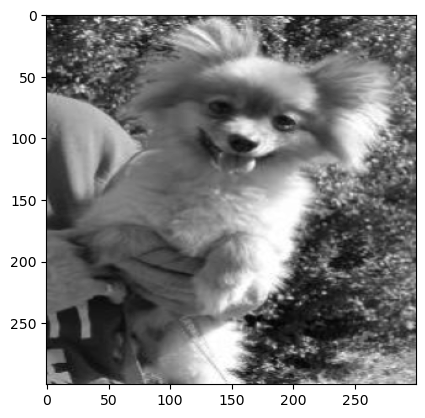

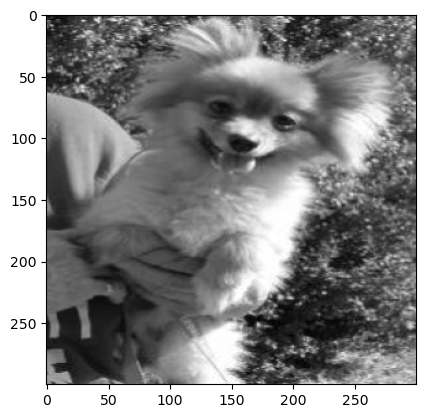

In [20]:
WHO = 0

IMG_SIZE = Z.shape[0]

IMG = XRAW[WHO]
IMG = cv2.resize( IMG, (IMG_SIZE, IMG_SIZE) )
plt.imshow( IMG , cmap="gray" )
plt.show()


IMG = X[WHO]
IMG = cv2.resize( IMG, (IMG_SIZE, IMG_SIZE) )
plt.imshow( IMG , cmap="gray" )
plt.show()


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)

In [22]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle( X_train, Y_train )

In [23]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8022, 300, 300, 1), (2006, 300, 300, 1), (8022,), (2006,))

In [24]:
"""
MODEL ACCURACY METRICS
"""

def get_TF_ProbAccuracyScores( NAME, MODEL, X, Y ) :
    probs = MODEL.predict( X )
    pred_list = []
    for p in probs :
        pred_list.append( np.argmax( p ) )
    pred = np.array( pred_list )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]


def print_ROC_Curve( TITLE, LIST ) :
    pass
    fig = plt.figure(figsize=(6,4))
    plt.title( TITLE )
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def print_Accuracy( TITLE, LIST ) :
    print( TITLE )
    print( "======" )
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print( NAME, " = ", ACC )
    print( "------\n\n" )

    
def confusion_Matrix( NAME, MODEL, X, Y ) :
    probs = MODEL.predict( X )
    probs = list( probs[0] )
    print( probs )
    maxValue = max( probs )
    print(maxValue)
    

In [25]:
B_theShapeSize = Z.shape
B_theActivation = tf.keras.activations.relu
B_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
B_theOptimizer = tf.keras.optimizers.Adam()

# Fill in the values you believe will give the best results
B_theEpochs = 500
B_theUnits = 25

In [26]:
B_LAYER_CONV2D_01 = tf.keras.layers.Conv2D( B_theUnits, (3,3), activation=B_theActivation, input_shape=B_theShapeSize  )
B_LAYER_POOL_01 = tf.keras.layers.MaxPooling2D( pool_size=(2,2) )

B_LAYER_CONV2D_02 = tf.keras.layers.Conv2D( 2*B_theUnits, (3,3), activation=B_theActivation, input_shape=B_theShapeSize  )
B_LAYER_POOL_02 = tf.keras.layers.MaxPooling2D( pool_size=(2,2) )

B_LAYER_CONV2D_03 = tf.keras.layers.Conv2D( 4*B_theUnits, (3,3), activation=B_theActivation, input_shape=B_theShapeSize  )
B_LAYER_POOL_03 = tf.keras.layers.MaxPooling2D( pool_size=(2,2) )

B_LAYER_CONV2D_04 = tf.keras.layers.Conv2D( 4*B_theUnits, (3,3), activation=B_theActivation, input_shape=B_theShapeSize  )
B_LAYER_POOL_04 = tf.keras.layers.MaxPooling2D( pool_size=(2,2) )


B_LAYER_FLATTEN = tf.keras.layers.Flatten()

B_LAYER_DENSE_01 = tf.keras.layers.Dense( units=8*B_theUnits, activation=B_theActivation )
B_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
B_LAYER_OUT = tf.keras.layers.Dense(2, activation=tf.nn.softmax )



model_B = tf.keras.models.Sequential()

model_B.add( B_LAYER_CONV2D_01 )
model_B.add( B_LAYER_POOL_01 )
model_B.add( B_LAYER_CONV2D_02 )
model_B.add( B_LAYER_POOL_02 )
model_B.add( B_LAYER_CONV2D_03 )
model_B.add( B_LAYER_POOL_03 )
model_B.add( B_LAYER_CONV2D_04 )
model_B.add( B_LAYER_POOL_04 )
model_B.add( B_LAYER_FLATTEN )
model_B.add( B_LAYER_DENSE_01 )
model_B.add( B_LAYER_OUT )

model_B.compile( optimizer = B_theOptimizer, loss=B_theLossMetric, metrics=['accuracy'] )
model_B.fit( X_train, Y_train, epochs=B_theEpochs )

tf.keras.models.save_model( model_B, "TFNN.pet.model.h6")




Epoch 1/500


251/251 [==============================] - 204s 806ms/step - loss: 0.6906 - accuracy: 0.5409
Epoch 2/500
251/251 [==============================] - 180s 717ms/step - loss: 0.6270 - accuracy: 0.6553
Epoch 3/500
251/251 [==============================] - 178s 709ms/step - loss: 0.5453 - accuracy: 0.7206
Epoch 4/500
251/251 [==============================] - 177s 707ms/step - loss: 0.4745 - accuracy: 0.7698
Epoch 5/500
251/251 [==============================] - 177s 706ms/step - loss: 0.4088 - accuracy: 0.8146
Epoch 6/500
251/251 [==============================] - 178s 711ms/step - loss: 0.3124 - accuracy: 0.8616
Epoch 7/500
251/251 [==============================] - 179s 714ms/step - loss: 0.2103 - accuracy: 0.9145
Epoch 8/500
251/251 [==============================] - 178s 707ms/step - loss: 0.1056 - accuracy: 0.9606
Epoch 9/500
251/251 [==============================] - 178s 707ms/step - loss: 0.0597 - accuracy: 0.9789
Epoch 10/500
251/251 [=============================

INFO:tensorflow:Assets written to: TFNN.pet.model.h6\assets


63/63 [==============================] - 8s 127ms/step


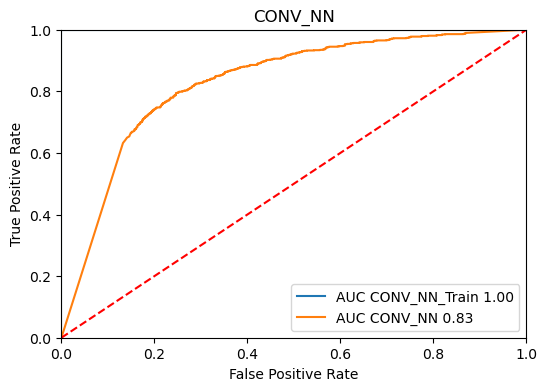

CONV_NN CLASSIFICATION ACCURACY
CONV_NN_Train  =  1.0
CONV_NN  =  0.7706879361914257
------




In [27]:
WHO = "CONV_NN"

TRAIN_RES = get_TF_ProbAccuracyScores( WHO + "_Train", model_B, X_train, Y_train )
TEST_RES = get_TF_ProbAccuracyScores( WHO, model_B, X_test, Y_test )

print_ROC_Curve( WHO, [ TRAIN_RES, TEST_RES ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_RES, TEST_RES ] )


In [28]:
tf.keras.models.save_model( model_B, "TFNN.pet.model.h6")

INFO:tensorflow:Assets written to: TFNN.pet.model.h6\assets


INFO:tensorflow:Assets written to: TFNN.pet.model.h6\assets


63/63 [==============================] - 10s 155ms/step


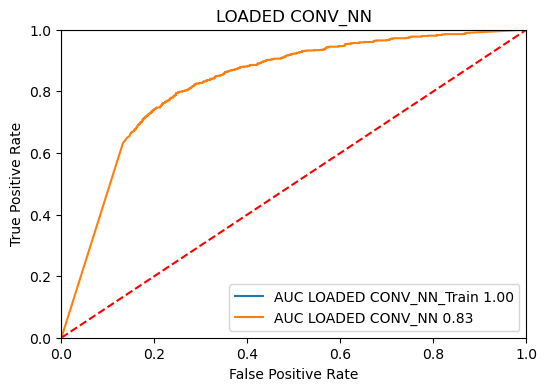

LOADED CONV_NN CLASSIFICATION ACCURACY
LOADED CONV_NN_Train  =  1.0
LOADED CONV_NN  =  0.7706879361914257
------




In [29]:

LOADED_MODEL = tf.keras.models.load_model( "TFNN.pet.model.h6")

WHO = "LOADED CONV_NN"

TRAIN_RES = get_TF_ProbAccuracyScores( WHO + "_Train", LOADED_MODEL, X_train, Y_train )
TEST_RES = get_TF_ProbAccuracyScores( WHO, LOADED_MODEL, X_test, Y_test )

print_ROC_Curve( WHO, [ TRAIN_RES, TEST_RES ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_RES, TEST_RES ] )


In [30]:
def confusion_Matrix( NAME, MODEL, X, Y ) :
    probs = MODEL.predict( X )
    classList = []
    CC = 0
    CD = 0
    DD = 0
    DC = 0
    for i in range( len(probs) ) :
        theList = list( probs[i] )
        theMax = max( theList )
        theIndex = theList.index( theMax )
        classList.append(theIndex)
        if Y[i] == 0 :
            if theIndex == 0 :
                CC = CC + 1
            else :
                CD = CD + 1
        else :
            if theIndex == 0 :
                DC = DC + 1
            else :
                DD = DD + 1
    print( "CC= ", CC )
    print( "DD= ", DD )
    print( "CD= ", CD )
    print( "DC= ", DC )
    return None
   

confusion_Matrix(  WHO + "_Train", LOADED_MODEL, X_train, Y_train )
confusion_Matrix(  WHO, LOADED_MODEL, X_test, Y_test )


251/251 [==============================] - 38s 153ms/step
CC=  3984
DD=  4038
CD=  0
DC=  0
63/63 [==============================] - 10s 157ms/step
CC=  788
DD=  758
CD=  239
DC=  221


In [31]:
import matplotlib.pyplot as plt
import numpy as np

import cv2
import os

import pickle
import tensorflow as tf


In [32]:
model = tf.keras.models.load_model( "TFNN.pet.model.h6" )

In [58]:
CATEGORIES = ["CAT","DOG"]
IMG_SIZE = 300

PATH = r"C:\Users\JCK\Documents\northwestern\DS 422\99\catsndogs"

# IMGFILE = "DOG_001.jpg"
# IMGFILE = "CAT_001.jpg"
#IMGFILE = r"KUMO.jpg"
IMGFILE = r"soupball.jpg"
#IMGFILE = "DOG_002.jpg"
#IMGFILE = "CAT_002.jpg"
#IMGFILE = "DOG_003.jpg"


In [59]:
FILENAME = os.path.join( PATH, IMGFILE )
print( FILENAME )
IMG_RAW = cv2.imread( FILENAME, cv2.IMREAD_GRAYSCALE )
IMG = cv2.resize( IMG_RAW, (IMG_SIZE, IMG_SIZE) )

X_RAW = np.array( IMG ).reshape( -1, IMG_SIZE, IMG_SIZE, 1)



C:\Users\JCK\Documents\northwestern\DS 422\99\catsndogs\soupball.jpg


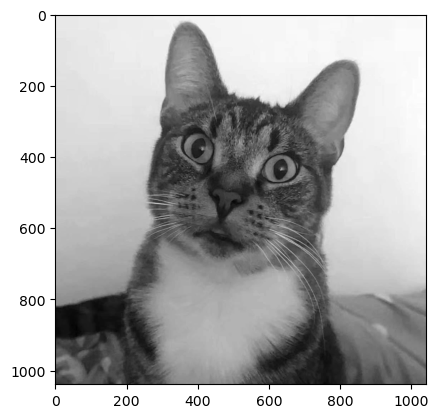

In [60]:
plt.imshow( IMG_RAW, cmap="gray" )
plt.show()

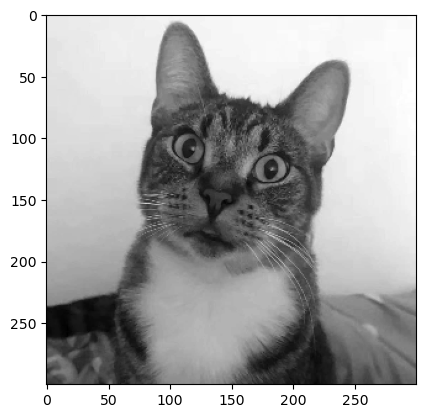

In [61]:
plt.imshow( IMG, cmap="gray" )
plt.show()

In [62]:
# Normalize the Data

print( X_RAW.shape )
print( X_RAW.shape[1:] )

X = X_RAW/255.0
#X = X_RAW


(1, 300, 300, 1)
(300, 300, 1)


In [63]:
Y = model.predict(X)
Y = list( Y[0] )
print( Y )

maxValue = max( Y )
theIndex = Y.index( maxValue )

print("This is a .....", CATEGORIES[ theIndex ])

1/1 [==============================] - 0s 32ms/step
[1.0, 8.175657e-13]
This is a ..... CAT


In [1]:
!jupyter nbconvert --to pdf Assignment_catsndogs_KWOK.ipynb

[NbConvertApp] Converting notebook Assignment_catsndogs_KWOK.ipynb to pdf
[NbConvertApp] Support files will be in Assignment_catsndogs_KWOK_files/
[NbConvertApp] Making directory ./Assignment_catsndogs_KWOK_files
[NbConvertApp] Writing 676727 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 842847 bytes to Assignment_catsndogs_KWOK.pdf
